# MNIST Digit Recognition
## Convolutional Neural Networks

We'll recognize handwritten digits using a convolutional neural network on top of Keras framework.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
%matplotlib inline

## Fix random seed for reproducibility

In [3]:
np.random.seed(42)

## Load Data

Download MNIST dataset.

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### Reshape dataset so it is suitable for use training a CNN

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#### Normalize inputs from 0-255 to 0-1

In [7]:
X_train /= 255
X_test /= 255

#### One hot encode outputs

We're dealing with handwritten digit classification, therefore the classes are 0, 1, 2, ... 9 (total: 10).

In [8]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

## Visualize random images.

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


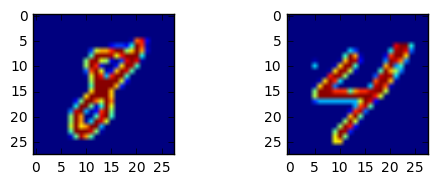

In [9]:
plt.subplot(221)
plt.imshow(X_train[17].squeeze())
plt.subplot(222)
plt.imshow(X_train[89].squeeze())

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

## Build Neural Model

1. C1 - Convolutional layer with 6 feature maps of size 5×5 with relu activation.
2. S2 - Pooling layer taking the max over 2*2 patches.
3. C3 - Convolutional layer with 16 feature maps of size 5×5  with relu activation.
4. S4 - Pooling layer taking the max over 2*2 patches.
5. Flatten layer.
6. C5 - Fully connected layer with 120 neurons with relu activation.
7. Dropout layer with a probability of 50%.
6. F6 - Fully connected layer with 84 neurons with relu activation.
7. Dropout layer with a probability of 50%.
9. OUTPUT - Output layer with softmax activation.

In [10]:
model = Sequential()

# convolution C1 layer 
model.add(Convolution2D(6, 5, 5, border_mode='same', input_shape=(28, 28, 1), activation='relu'))

# pooling S2 layer 
model.add(MaxPooling2D(pool_size=(2, 2)))

# convolution C3 layer 
model.add(Convolution2D(16, 5, 5, activation='relu'))

# pooling S4 layer 
model.add(MaxPooling2D(pool_size=(2, 2)))

# connect S4 and C5
model.add(Flatten())

# fully-connected C5 layer 
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.5))

# fully-connected F6 layer with dropout regularization
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.5))

# fully-connected OUTPUT layer with softmax activation
model.add(Dense(10, activation="softmax"))

In [11]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 28, 28, 6)     156         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 14, 14, 6)     0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 10, 10, 16)    2416        maxpooling2d_1[0][0]             
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 5, 5, 16)      0           convolution2d_2[0][0]            
___________________________________________________________________________________________

## Train Model

In [12]:
batch_size = 200
num_epochs = 20

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
start_time = time.time()

In [15]:
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=num_epochs, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 28s - loss: 0.7098 - acc: 0.7664 - val_loss: 0.1225 - val_acc: 0.9636
Epoch 2/20
60000/60000 [==============================] - 28s - loss: 0.1997 - acc: 0.9434 - val_loss: 0.0656 - val_acc: 0.9794
Epoch 3/20
60000/60000 [==============================] - 25s - loss: 0.1401 - acc: 0.9616 - val_loss: 0.0581 - val_acc: 0.9831
Epoch 4/20
60000/60000 [==============================] - 25s - loss: 0.1170 - acc: 0.9685 - val_loss: 0.0424 - val_acc: 0.9869
Epoch 5/20
60000/60000 [==============================] - 25s - loss: 0.0986 - acc: 0.9737 - val_loss: 0.0400 - val_acc: 0.9867
Epoch 6/20
60000/60000 [==============================] - 25s - loss: 0.0844 - acc: 0.9776 - val_loss: 0.0395 - val_acc: 0.9876
Epoch 7/20
60000/60000 [==============================] - 27s - loss: 0.0765 - acc: 0.9796 - val_loss: 0.0396 - val_acc: 0.9875
Epoch 8/20
60000/60000 [==============================

In [20]:
end_time = time.time()

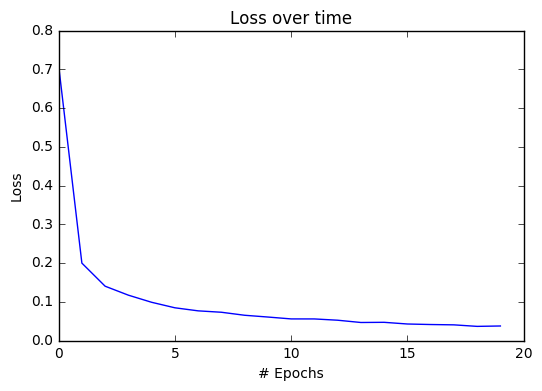

In [21]:
plt.plot(history.history["loss"])
plt.xlabel("# Epochs")
plt.ylabel("Loss")
plt.title("Loss over time")
plt.show()

## Evaluate Model

In [22]:
training_score = model.evaluate(X_train, Y_train, verbose=0)
test_score = model.evaluate(X_test, Y_test, verbose=0)

In [23]:
print("Training duration: {0:.1f} sec".format(end_time - start_time))
print("Training accuracy: {0:.3f}%".format(training_score[1] * 100))
print("Test accuracy: {0:.3f}%".format(test_score[1] * 100))

Training duration: 559.3 sec
Training accuracy: 99.622%
Test accuracy: 99.280%
